### Day 2: Matrix Implementation from Scratch
**Goal: Understand Matrices as Transformations**

In [10]:
import math
from typing import List, Union
from vector import Vector

class Matrix:
    """
    Matrix Class representing linear transformations.

    A matrix is viewed geometrically as a transformation that maps vectors 
    to new vectors. Each column represents where the basis vectors land
    after the transformation.

    Attributes:
        data: 2D list of numbers representing the matrix
        rows: number of rows in the matrix
        cols: number of columns in the matrix
    Example:
        >>> M = Matrix([[2,0], [0,3]]) # Scaling transformation
        >>> v = Vector([1,1])
        >>> result = M.multiply_vector(v) # should give Vector([2,3])
    """
    def __init__(self, data: List[List[float]]):
        """
        Initialize matrix from 2D list.

        Args:
            data: 2D list where each inner list is a row
                ex: [[1,2], [3,4]] represents a 2x2 matrix.
        """
        self.data = data
        self.rows = len(data) #counts number of inner lists (rows)
        self.cols = len(data[0]) if data else 0 # counts how many elements are in first row (columns). checks for empty matrix 

    def __repr__(self) -> str:
        """
        Return string representation for debugging.

        Returns:
            String like "Matrix([[1,2], [3,4])"
        """
        return f"Matrix({self.data})"
    
    def __str__(self) -> str:
        """

        Pretty print the matrix in reaadable format.

        Returns:
         Multi-line string with formatted matrix
         Example:
             [1.00, 2.00]
             [3.00, 4.00]
        """
        rowstrings = []
        for row in self.data:
            rstring = ", ".join(f"{num:.2f}" for num in row)
            rowstrings.append(rstring)

        return "\n".join(rowstrings)

    def get_column(self, col_index: int) -> Vector:
        """
        Extract a column as a vector.

        Geometric: The i-th column shows where the i-th basis vector lands
        after this transformation.

        Args:
            col_index: Which column to extract (0-indexed)
        Returns:
            Vector containing the column values
        """
        column = [row[col_index] for row in self.data]
        return column

    def multiply_vector(self, vector: Vector) -> Vector:
        """
        Apply this transformation to a vector (matrix-vector multiplication)

        Geometric: Where does this vector land after the transformation 
        represented by this matrix?

        Math: Each component of result is a dot product of a matrix row
        with the input vector.

        Args:
            vector: the vector to transform
        
        Returns:
            Transformed Vector
        
        Raises: ValueError: If matrix columns don't match vector dimension

        Example:
            >>>M = Matrix([[2,0], [0,3]) #scale x by 2, y by 3)
            >>>v = Vector([1,1]) # returns Vector([2,3])
        """
        if (len(vector.components) != self.cols):
            raise ValueError("Dimensions don't match columns")
        result = [vector.dot(Vector(row)) for row in self.data]
        return Vector(result)

    @staticmethod
    def rotation(angle_degrees: float) -> 'Matrix':
        """
        Create a 2D rotation matrix (counterclockwise)
        Rotates vectors counterclockwise by the given angle.

        Args:
            angle_degrees: Rotation angle in degrees
        
        Returns:
            2x2 rotation matrix
        
        Formula:
            [cos(θ)  -sin(θ)]
            [sin(θ)   cos(θ)]
        Example:
            >>> R = Matrix.rotation(90) # 90 degree rotation
            >>> v = Vector([1,0]) # Unit vector along x-axis
            >>> R.multiply_vector(v) # Should give approximately [0,1]
        """
        radians = math.radians(angle_degrees)
        r1 = [math.cos(radians), -math.sin(radians)]
        r2 = [math.sin(radians), math.cos(radians)]

        return Matrix([r1,r2])

    @staticmethod
    def scaling(sx: float, sy:float) -> 'Matrix':
        """
        Create a 2D scaling matrix.

        Scales x-coords by sx and y-coords by sy.

        Args:
            sx: Scale factor for x-direction
            sy: Scale factor for y-direction

        Returns:
            2x2 scaling matrix

        Mathematical formula:
            [sx 0]
            [0 sy]
        Example:
            >>> S = Matrix.scaling(2, 3)
            >>> v = Vector([1, 1])
            >>> S.multiply_vector(v)  # Returns Vector([2, 3])
        """
        return Matrix([[sx, 0], [0, sy]])

    @staticmethod
    def shear(shear_factor: float) -> 'Matrix':
        """
        Create a 2D shear matrix.

        Shears the plane along the x-axis. Points move horizontally
        in proportion to their y-coordinate.

        Args:
            shear_factor: how much to shear

        Returns:
            2x2 shear matrix

        Mathematical formula:
            [1  shear_factor]
            [0       1      ]

        Example:
            >>> Sh = Matrix.shear(1)
            >>> v = Vector([0, 1])  # Point at (0,1)
            >>> Sh.multiply_vector(v)  # Returns Vector([1, 1])
        """
        return Matrix([[1, shear_factor], [0, 1]])
        
        
            
        

In [11]:
# Test Cases

M = Matrix([[2, 0], [0, 3]])
v = Vector([3, 4])
result = M.multiply_vector(v)
print(result)
# Expected: Vector([6, 12]) - scaled by 2x and 3y

R = Matrix.rotation(90)
v = Vector([1, 0])
rotated = R.multiply_vector(v)
print(rotated)
# Expected: approximately Vector([0, 1])

v = Vector([3, 4])
scaled = Matrix.scaling(2, 0.5).multiply_vector(v)
print(scaled)
# Expected: Vector([6, 2])

Vector([6, 12])
Vector([6.123233995736766e-17, 1.0])
Vector([6, 2.0])


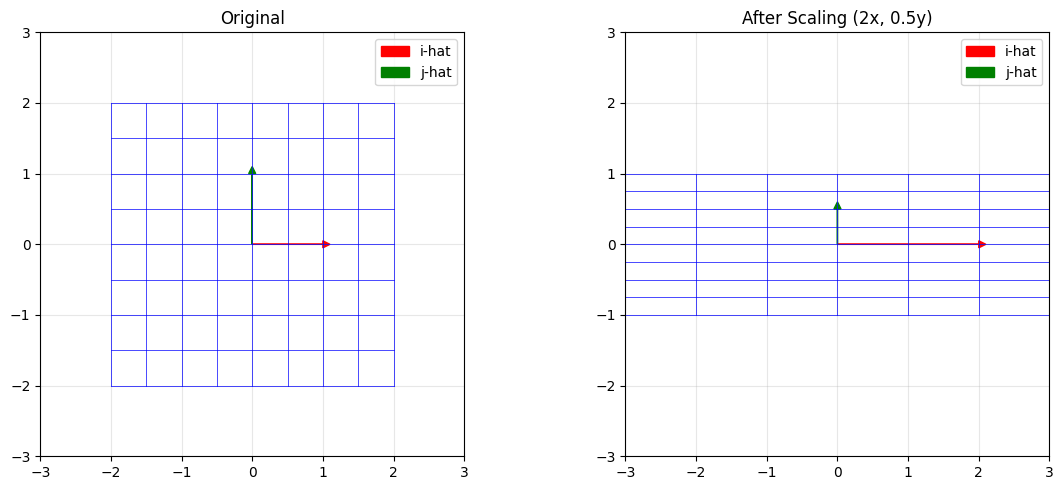

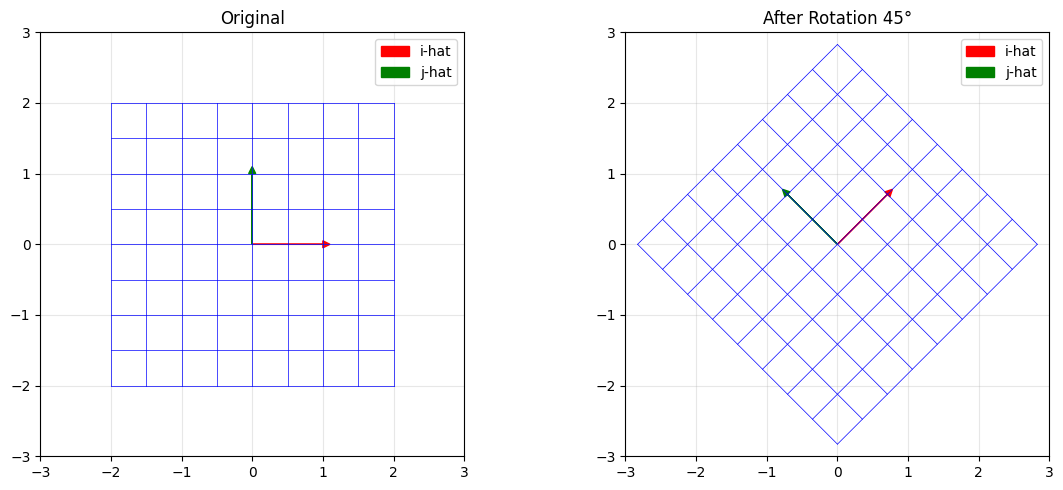

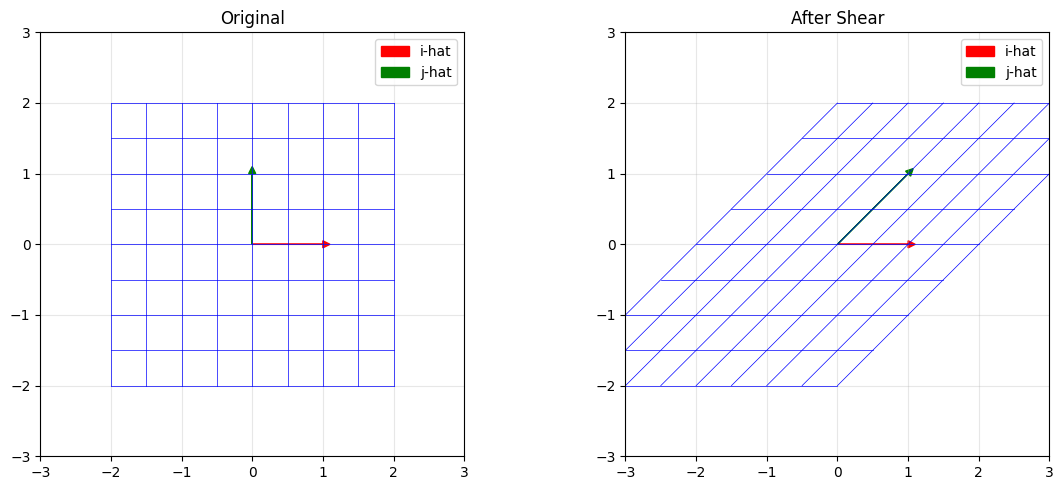

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional
from matplotlib.patches import FancyArrowPatch
from matplotlib.animation import FuncAnimation

def plot_transformation(matrix, title: str= "Transformation") -> None:
    """
    Visualize how a matrix transforms the 2D plane.

    Shows side-by-side comparison of:
     - Original 2D grid and basis vectors (i-hat, j-hat)
     - Transformed grid and basis vectors after applying matrix

    This helps build geometric intuition for what matrices actually do
    to the space. Watch how the grid lines bend, stretch, or rotate.

    Args:
        matrix: Matrix object to visualize
        title: Description of the transformation

    Visual Elements:
        - Blue grid lines show how space is warped
        - Red arrow (i-hat): x-axis basis vector
        - Green arrow (j-hat): y-axis basis vector [0,1]

    Example Usage:
        >>> M = Matrix.scaling(2,0.5)
        >>> plot_transformation(M, "Scaling (2x, 0.5y)")
        # Shows original square grid stretched horizontally, compressed vertically
    """
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,5)) # 1 row, 2 columns
    
    # Create grid points
    x_points = np.linspace(-2,2,9)
    y_points = np.linspace(-2,2,9)

    # Plot original grid on ax1
    for x in x_points: 
        ax1.plot([x, x], [y_points[0], y_points[-1]], 'b-', linewidth=0.5)
    for y in y_points:
        ax1.plot([x_points[0], x_points[-1]], [y, y], 'b-', linewidth=0.5)
    
    # Plot basis vectors on ax1 (original)
    ax1.arrow(0, 0, 1, 0, head_width=0.1, head_length=0.1, fc='red', ec='red', label='i-hat')
    ax1.arrow(0, 0, 0, 1, head_width=0.1, head_length=0.1, fc='green', ec='green', label='j-hat')
    ax1.set_xlim(-3, 3)
    ax1.set_ylim(-3, 3)
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    ax1.set_title('Original')
    ax1.legend()
    
    # Plot transformed grid on ax2
    for x in x_points:
        # Transform vertical line
        points = np.array([[x, y] for y in y_points])
        transformed = np.array([matrix.multiply_vector(Vector(p)).components for p in points])
        ax2.plot(transformed[:, 0], transformed[:, 1], 'b-', linewidth=0.5)
    
    for y in y_points:
        # Transform horizontal line
        points = np.array([[x, y] for x in x_points])
        transformed = np.array([matrix.multiply_vector(Vector(p)).components for p in points])
        ax2.plot(transformed[:, 0], transformed[:, 1], 'b-', linewidth=0.5)
    
    # Plot transformed basis vectors
    i_hat = matrix.multiply_vector(Vector([1, 0])).components
    j_hat = matrix.multiply_vector(Vector([0, 1])).components
    ax2.arrow(0, 0, i_hat[0], i_hat[1], head_width=0.1, head_length=0.1, fc='red', ec='red', label='i-hat')
    ax2.arrow(0, 0, j_hat[0], j_hat[1], head_width=0.1, head_length=0.1, fc='green', ec='green', label='j-hat')
    ax2.set_xlim(-3, 3)
    ax2.set_ylim(-3, 3)
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    ax2.set_title(f'After {title}')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Test the visualization with different transformations

# 1. Scaling transformation
M = Matrix.scaling(2, 0.5)
plot_transformation(M, "Scaling (2x, 0.5y)")

# 2. Rotation transformation
R = Matrix.rotation(45)
plot_transformation(R, "Rotation 45°")

# 3. Shear transformation
Sh = Matrix.shear(1)
plot_transformation(Sh, "Shear")
     